In [2]:
import networkx as nx

In [3]:
g = nx.Graph()

In [4]:
g.add_edges_from([
    ('S', 'A', {'d': 7}),
    ('S', 'B', {'d': 2}),
    ('S', 'C', {'d': 3}),
    ('A', 'B', {'d': 3}),
    ('A', 'D', {'d': 4}),
    ('B', 'D', {'d': 4}),
    ('B', 'H', {'d': 1}),
    ('C', 'L', {'d': 2}),
    ('D', 'F', {'d': 5}),
    ('H', 'F', {'d': 3}),
    ('H', 'G', {'d': 2}),
    ('G', 'E', {'d': 2}),
    ('L', 'I', {'d': 4}),
    ('L', 'J', {'d': 4}),
    ('I', 'J', {'d': 6}),
    ('I', 'K', {'d': 4}),
    ('J', 'K', {'d': 4}),
    ('E', 'K', {'d': 5}),
])

In [5]:
for edge in g.edges:
    distance = g.edges[edge]['d']
    g.edges[edge]['w'] = 1/distance

{('S', 'A'): Text(-0.5437507134017583, 0.22212133772435522, '7'),
 ('S', 'B'): Text(-0.42351500649240315, 0.113077487433177, '2'),
 ('S', 'C'): Text(-0.07226430151212394, 0.38275757388819864, '3'),
 ('A', 'B'): Text(-0.6577817033670554, 0.05841774250942984, '3'),
 ('A', 'D'): Text(-0.8558208593521183, 0.020475937812940714, '4'),
 ('B', 'D'): Text(-0.735585152442763, -0.08856791247823749, '4'),
 ('B', 'H'): Text(-0.4817241000074706, -0.19274029989102234, '1'),
 ('C', 'L'): Text(0.3703451040548075, 0.4894839536595607, '2'),
 ('D', 'F'): Text(-0.8671106898831161, -0.30489301296635335, '5'),
 ('H', 'F'): Text(-0.6132496374478237, -0.4090654003791382, '3'),
 ('H', 'G'): Text(-0.2225059032578545, -0.40690209410403555, '2'),
 ('L', 'I'): Text(0.7878673973033784, 0.4103757559664114, '4'),
 ('L', 'J'): Text(0.707804331093558, 0.3671764954487353, '4'),
 ('G', 'E'): Text(0.1807769257081812, -0.45945834155614607, '2'),
 ('E', 'K'): Text(0.6118582669265917, -0.2618155396469731, '5'),
 ('I', 'J'): T

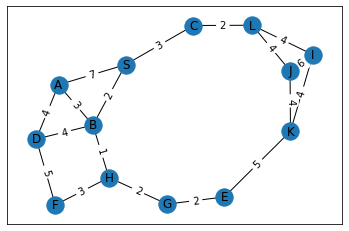

In [24]:
pos = nx.spring_layout(g, weight='w', iterations=250)
nx.draw_networkx(g, pos=pos)
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=nx.get_edge_attributes(g, 'd'))


In [25]:
class Dijkstra_algorithm():
    def __init__(self,start,end, graph) -> None:
        self.start = start
        self.end = end
        self.graph = graph
        self.distance = Dijkstra_algorithm.set_inf_distance(self)
        self.start_vertex = Dijkstra_algorithm.start_vertex(self)
        self.get_distance = Dijkstra_algorithm.get_distance_map(self)

    def set_inf_distance(self):
        distances = {i: float('infinity') for i in self.graph}
        return distances

    def start_vertex(self):
        self.distance[self.start] = (self.start,0)
        self.visited = [self.start]
        for neighbor, weight in self.graph[self.start].items():
            self.distance[neighbor] = (self.start, weight["d"])
        return self.distance
    
    def get_distance_map(self):
        while len(self.visited) != len(self.graph.nodes):
        # order the distance of each neighbor
            collect = []
            for key, value in self.distance.items():
                if value != float("inf"):
                    collect.append((key,value[1]))
            # get the lower one --> if in the visited list pop it
            collect = sorted(collect, key=lambda x: x[1])
            while collect[0][0] in self.visited:
                collect = collect[1:]
            self.start_vertex= collect[0][0]
            self.visited.append(self.start_vertex)
            # order the distances list if not in visted the lowest get neighbor and their distance
            for neighbor, weight in self.graph[self.start_vertex].items():
                original_value = self.distance[self.start_vertex][1]
                if self.distance[neighbor] == float("inf"):
                    self.distance[neighbor] = (self.start_vertex, weight["d"]+ original_value)
                else:
                    current = weight["d"] + original_value
                    if current < self.distance[neighbor][1]:
                        self.distance[neighbor] = (self.start_vertex, current)
        return self.distance
    
    def get_shortest_path(self):
        end_vertex = self.end
        collect = []
        previous_value = self.distance[end_vertex][1]
        while previous_value != 0:
            collect.append(end_vertex)
            end_vertex = distances[end_vertex][0]
            previous_value = distances[end_vertex][1]
        collect.append(self.start)
        return collect[::-1]

algorithm = Dijkstra_algorithm("S","E",g)
print(algorithm.get_distance_map())
print(algorithm.get_shortest_path())

{'S': ('S', 0), 'A': ('B', 5), 'B': ('S', 2), 'C': ('S', 3), 'D': ('B', 6), 'H': ('B', 3), 'L': ('C', 5), 'F': ('H', 6), 'G': ('H', 5), 'E': ('G', 7), 'I': ('L', 9), 'J': ('L', 9), 'K': ('E', 12)}
['S', 'B', 'H', 'G', 'E']


In [18]:

# get start nodes
start_vertex = "S"
distances = {i: float('infinity') for i in g}
distances[start_vertex] = (start_vertex,0)
visited = [start_vertex]
for neighbor, weight in g[start_vertex].items():
        distances[neighbor] = (start_vertex, weight["d"])
# get neighbor vertex and their distance
while len(visited) != len(g.nodes):
    # order the distance of each neighbor
    collect = []
    for key, value in distances.items():
        if value != float("inf"):
            collect.append((key,value[1]))
    # get the lower one -->if in the visited list pop it
    collect = sorted(collect, key=lambda x: x[1])
    while collect[0][0] in visited:
        collect = collect[1:]
    start_vertex = collect[0][0]
    visited.append(start_vertex)
    # order the distances list if not in visted the lowest get neighbor and their distance
    for neighbor, weight in g[start_vertex].items():
        original_value = distances[start_vertex][1]
        if distances[neighbor] == float("inf"):
            distances[neighbor] = (start_vertex, weight["d"]+ original_value)
        else:
            current = weight["d"] + original_value
            if current < distances[neighbor][1]:
                distances[neighbor] = (start_vertex, current)
print(distances)
end_vertex = "E"
collect = []
previous_value = distances[end_vertex][1]
previous = distances[end_vertex][0]
while previous_value != 0:
    collect.append(end_vertex)
    end_vertex = distances[end_vertex][0]
    previous_value = distances[end_vertex][1]
collect.append(end_vertex)
print(collect[::-1])


{'S': ('S', 0), 'A': ('B', 5), 'B': ('S', 2), 'C': ('S', 3), 'D': ('B', 6), 'H': ('B', 3), 'L': ('C', 5), 'F': ('H', 6), 'G': ('H', 5), 'E': ('G', 7), 'I': ('L', 9), 'J': ('L', 9), 'K': ('E', 12)}


In [106]:
import json
with open('graph.json', 'w') as fout:
    json.dump(nx.cytoscape_data(g), fout, indent=4)

In [107]:
nx.shortest_path(g, 'S', 'E', weight='d')

['S', 'B', 'H', 'G', 'E']